# SEEJ work project for Scott Wolk

### Project:
Find a list of targets in the TESS Survey that are candidate super-Neptunes / Jupiters in close orbits.
That also have a detection in the ROSAT All Sky Survey (RASS)..
That's all! :D


### Notes:

#### TESS:
Webpage for the TESS TCEs (Threshold Crossing Events) files for Sectors 1 & 2:
http://archive.stsci.edu/tess/bulk_downloads/bulk_downloads_tce.html

/Users/elwin/WORK/SEEJwork/tess_tce_sector[1,2].txt

These files give the information on (suspected) planet, giving Orbital Period and Planet Radius (in R_earth)

Find candidates that look like they have a Hot Jupiter or Neptune (or Earth; create 3 catalogs) 

Then need to feed this back into the online catalogs to find out the [RA,Dec] etc. of the host star. 

With this list we can compare to the RASS catalog and find out which ones have an X-ray detection...

#### The Preamble...

In [1]:
% matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import astropy 

import astropy.io.ascii as ascii
from astropy.io import fits
from astropy import units 
from astropy.coordinates import SkyCoord

import pickle



In [26]:
from astroquery.mast import Catalogs

#### Read in the two Sector TCE catalogs...

In [3]:
tce_sec1 = ascii.read('tess_tce_sector1.txt')
tce_sec2 = ascii.read('tess_tce_sector2.txt')

In [28]:
tic_id1, tic_id2 = tce_sec1['ticid'], tce_sec2['ticid'] 

#### Find the positional data for the TCE objects from the TIC catalog...

In [37]:
tce1_catdata = Catalogs.query_criteria(catalog='Tic', objID=tic_id1)
tce2_catdata = Catalogs.query_criteria(catalog='Tic', objID=tic_id2)

In [63]:
# Coordinates are not readable by SkyCoord so reformat the input string

readable_coords1 = []
for coord in tce1_catdata['TWOMASS']:
    read_coord = coord[0:2] + ' ' + coord[2:4] + ' ' + coord[4:6] + '.' + coord[6:8] + ' ' + coord[8:11] + ' ' + coord[11:13] + ' ' + coord[13:15] + '.' + coord[15:] 
    readable_coords1.append(read_coord)

In [64]:
readable_coords2 = []
for coord in tce2_catdata['TWOMASS']:
    read_coord = coord[0:2] + ' ' + coord[2:4] + ' ' + coord[4:6] + '.' + coord[6:8] + ' ' + coord[8:11] + ' ' + coord[11:13] + ' ' + coord[13:15] + '.' + coord[15:] 
    readable_coords2.append(read_coord)

In [66]:
cat_tce1 = SkyCoord(readable_coords1, unit=(units.hourangle, units.degree), frame='icrs')
cat_tce2 = SkyCoord(readable_coords2, unit=(units.hourangle, units.degree), frame='icrs')

##### Lists are different lengths!  Check for duplicates (multiple planets per star) and see if numbers match: yup!

In [67]:
len(tce_sec1),len(tce_sec2),len(tic_id1),len(tic_id2),len(tce1_catdata),len(tce2_catdata),len(cat_tce1),len(cat_tce2)

(1558, 1348, 1558, 1348, 1031, 906, 1031, 906)

In [68]:
len(list(set(tic_id1))), len(list(set(tic_id2))) 

(1031, 906)

#### Make some plots of the data to examine Planet Radius and Orbital Period/AU distributions

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 9 Text yticklabel objects>)

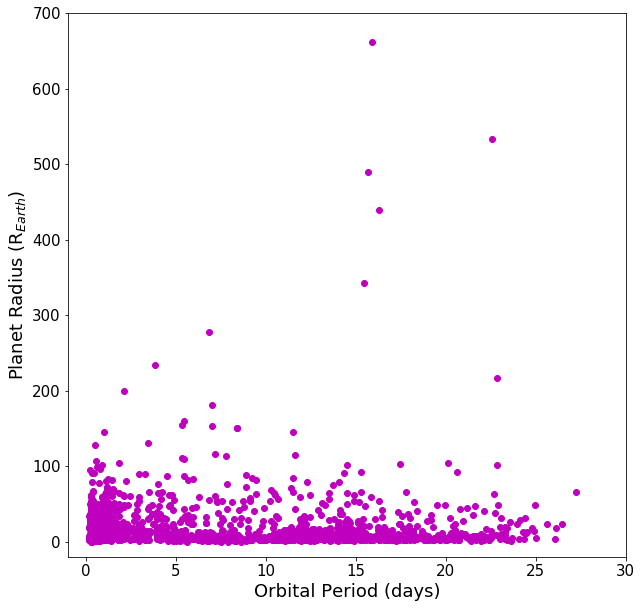

In [5]:
fig = plt.figure(figsize=(10,10))

plt.plot( tce_sec1['orbitalPeriodDasys'], tce_sec1['planetRadiusEarthRadii'], 'om' )

plt.xlabel('Orbital Period (days)', fontsize=18)
plt.ylabel('Planet Radius (R$_{Earth}$)', fontsize=18)

plt.xlim(-1,30)
plt.ylim(-20, 700)
plt.xticks(size=15)
plt.yticks(size=15)



(array([  1.00000000e-04,   1.00000000e-03,   1.00000000e-02,
          1.00000000e-01,   1.00000000e+00,   1.00000000e+01,
          1.00000000e+02,   1.00000000e+03,   1.00000000e+04,
          1.00000000e+05]), <a list of 10 Text yticklabel objects>)

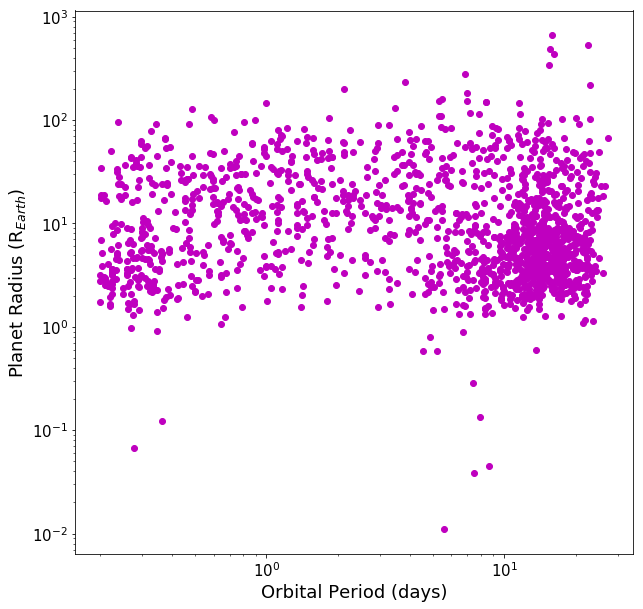

In [6]:
fig = plt.figure(figsize=(10,10))

plt.plot( tce_sec1['orbitalPeriodDasys'], tce_sec1['planetRadiusEarthRadii'], 'om' )

plt.xlabel('Orbital Period (days)', fontsize=18)
plt.ylabel('Planet Radius (R$_{Earth}$)', fontsize=18)

plt.yscale('log')
plt.xscale('log')
#plt.xlim(0,30)
#plt.ylim(0, 700)
plt.xticks(size=15)
plt.yticks(size=15)




(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 9 Text yticklabel objects>)

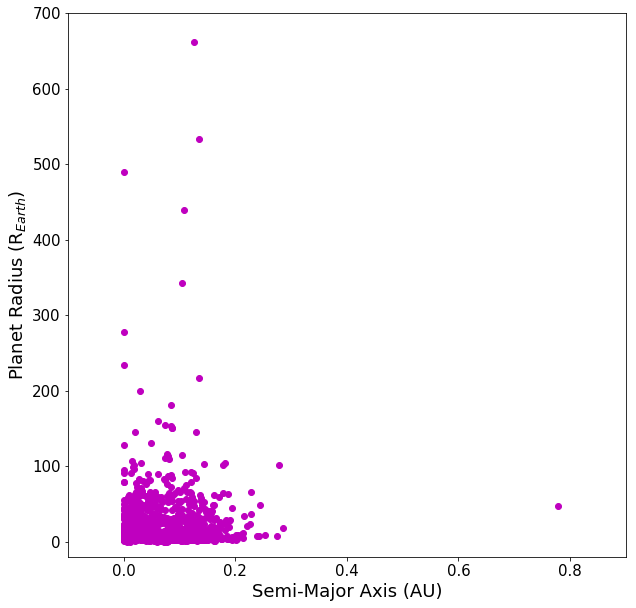

In [7]:
fig = plt.figure(figsize=(10,10))

plt.plot( tce_sec1['semiMajorAxisAu'], tce_sec1['planetRadiusEarthRadii'], 'om' )

plt.xlabel('Semi-Major Axis (AU)', fontsize=18)
plt.ylabel('Planet Radius (R$_{Earth}$)', fontsize=18)

plt.xlim(-0.1,0.9)
plt.ylim(-20, 700)
plt.xticks(size=15)
plt.yticks(size=15)




(array([  1.00000000e-04,   1.00000000e-03,   1.00000000e-02,
          1.00000000e-01,   1.00000000e+00,   1.00000000e+01,
          1.00000000e+02,   1.00000000e+03,   1.00000000e+04,
          1.00000000e+05]), <a list of 10 Text yticklabel objects>)

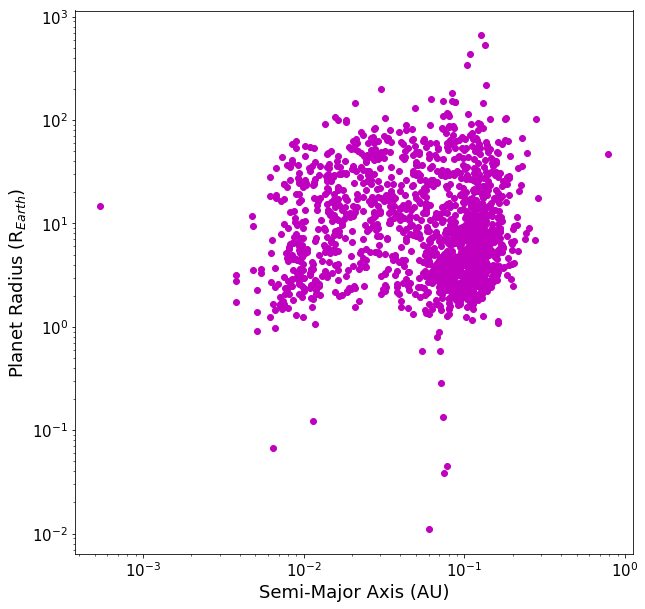

In [8]:
fig = plt.figure(figsize=(10,10))

plt.plot( tce_sec1['semiMajorAxisAu'], tce_sec1['planetRadiusEarthRadii'], 'om' )

plt.xlabel('Semi-Major Axis (AU)', fontsize=18)
plt.ylabel('Planet Radius (R$_{Earth}$)', fontsize=18)

plt.yscale('log')
plt.xscale('log')
#plt.xlim(-0.1,0.9)
#plt.ylim(-20, 700)
plt.xticks(size=15)
plt.yticks(size=15)




#### What constitutes a Hot Neptune plus sized planet?  
What is the minimum planetary radius/mass versus orbital period?

So Rneptune = 3.9 Rearth,  Rjupiter = 11.2 Rearth
Hot Jupiter orbital period ~< 10 days
Proposal says average ~ 3.5 days

So select for anything with orbital period less than ten days/ 0.1 AU? and radius greater than 4 Rearth?

Let's just match to RASS first and figure out what's what later on...


#### Read in the RASS Public Archive file to determine what matches there are

In [15]:
# Clean up the file - it's got a carriage return on the day field that's creating extra lines...

#from itertools import islice

#with open('rosarchive_final.pos') as fin, open('rosarchive_final_fix_carriage_return.pos', 'w') as fout:
#    fout.writelines(islice(fin, None, None, 2))

In [13]:
rass_archive = ascii.read('rosarchive_final_fix_carriage_return.pos', format='fixed_width', delimiter=' ')

In [92]:
len(rass_archive)

12833

In [15]:
rra, rde = rass_archive['RA(2000)'], rass_archive['DEC(2000)']

In [18]:
cat_rass = SkyCoord(rra, rde, unit=(units.hourangle, units.degree), frame='icrs')

(array([-100.,  -75.,  -50.,  -25.,    0.,   25.,   50.,   75.,  100.]),
 <a list of 9 Text yticklabel objects>)

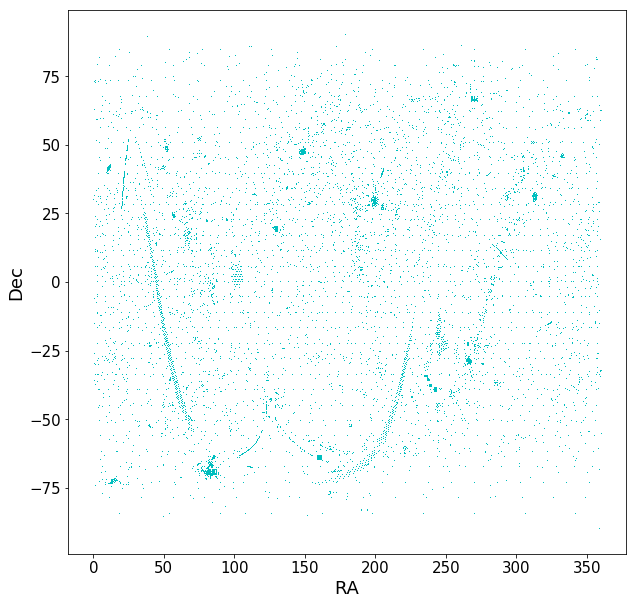

In [91]:
# Plot the spatial distribution on sky of the the full RASS catalog

fig = plt.figure(figsize=(10,10))

plt.plot(cat_rass.ra, cat_rass.dec, ',c')

plt.xlabel('RA', fontsize=18)
plt.ylabel('Dec', fontsize=18)

#plt.xlim(-0.1,0.9)
#plt.ylim(-20, 700)
plt.xticks(size=15)
plt.yticks(size=15)


#### Match the two TCE catalogs to the RASS catalog...

In [69]:
id1r, d21r, d31r  = cat_tce1.match_to_catalog_sky(cat_rass)
id2r, d22r, d32r  = cat_tce1.match_to_catalog_sky(cat_rass)

In [79]:
w1r = np.where(d21r.arcsec <= 600.0)[0]
w2r = np.where(d22r.arcsec <= 600.0)[0]

In [80]:
len(w1r), len(w2r)

(14, 14)

(array([ -25.,    0.,   25.,   50.,   75.,  100.,  125.,  150.,  175.,
         200.,  225.]), <a list of 11 Text yticklabel objects>)

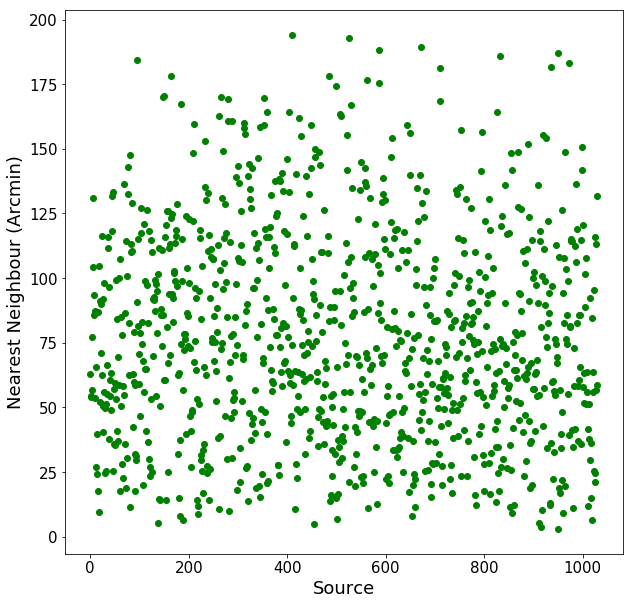

In [86]:
fig = plt.figure(figsize=(10,10))

plt.plot(d21r.arcmin, 'og')

plt.xlabel('Source', fontsize=18)
plt.ylabel('Nearest Neighbour (Arcmin)', fontsize=18)

#plt.xlim(-0.1,0.9)
#plt.ylim(-20, 700)
plt.xticks(size=15)
plt.yticks(size=15)



(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 <a list of 7 Text yticklabel objects>)

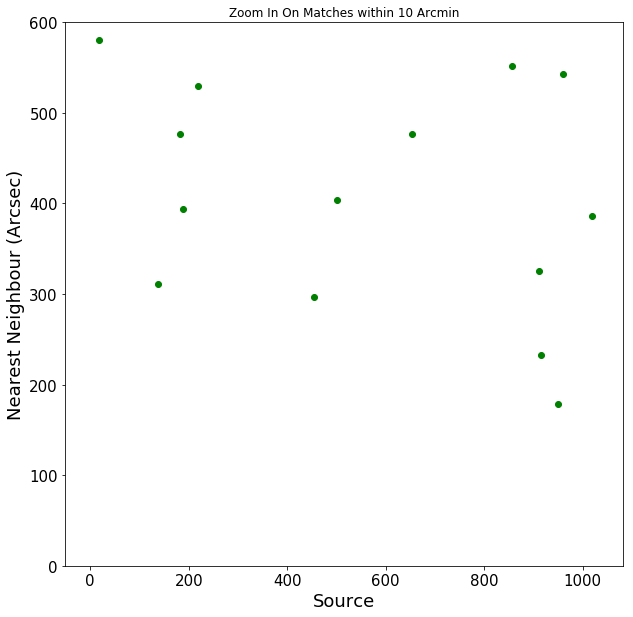

In [90]:
fig = plt.figure(figsize=(10,10))

plt.plot(d21r.arcsec, 'og')

plt.xlabel('Source', fontsize=18)
plt.ylabel('Nearest Neighbour (Arcsec)', fontsize=18)

plt.title('Zoom In On Matches within 10 Arcmin')
#plt.xlim(-0.1,0.9)
plt.ylim(0, 600)
plt.xticks(size=15)
plt.yticks(size=15)
